In [130]:
# STEP 1 -  의존성 로드 ############################################################
import numpy as np
import pandas as pd
import os
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import seaborn as sns # seaborn ref : https://greeksharifa.github.io/machine_learning/2019/12/05/Seaborn-Module/
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import statsmodels.api as sm;
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process.kernels import RBF
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt # plotting
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import sklearn

## 정확도 지표 정의
def metrics(y_test,pred):
    print("ACC : ",accuracy_score(y_test,pred))
    print("Precision : ", precision_score(y_test,pred))
    print("recall(TP rate) : ", recall_score(y_test,pred))
    print("F1 : " , f1_score(y_test,pred))
    print("ROC SCORE : ", roc_auc_score(y_test,pred,average="macro"))


%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

In [134]:
## DATA LOAD & Null Inspection
df = pd.read_csv('2018_17_16_OUTCOME.csv')
df = sklearn.utils.shuffle(df,random_state=1)
df.head(10)


,age,wt_itvex,ainc,DI1_pr,DI2_pr,HE_DMfh3,HE_ht,HE_wc,HE_BMI,HE_DM,HE_chol,HE_HDL_st2,HE_TG,HE_hcv,HE_HCT,HE_Uro,HE_NNAL,HE_UCREA,BM7,GS_mea_r_1,N_WAT_C,N_INTK,N_PROT,N_SFA,N_N3,N_CHOL,N_CHO,N_TDF,N_SUGAR,N_FE,N_B1
79,55,7090.548476,83.333333,0,0,0,163.1,82.6,23.006126,1,211,77.0,394,0.03,40.1,0,1.400,54.10,5,30.4,30.0,3604.911005,243.438843,61.145786,2.913434,932.679024,577.256131,40.635854,74.621849,23.522965,3.255783
4136,77,6514.254599,62.000000,1,0,0,142.0,79.0,26.730807,0,187,44.0,117,0.05,34.5,0,1.400,129.20,1,24.0,5.0,1463.114303,119.108137,6.205948,0.200335,464.219787,112.715660,2.735953,0.100798,19.695954,1.324847
4665,70,614.986423,46.666667,0,0,0,161.8,91.9,23.788726,0,162,50.0,67,0.07,42.5,0,1.400,197.00,4,24.3,3.5,1043.888805,37.064908,9.827910,0.480422,160.839000,164.191606,16.132180,36.921540,6.157694,0.694530
5825,75,2975.181142,58.333333,1,1,0,162.5,89.2,24.842604,1,128,33.0,143,0.14,50.8,0,0.274,34.00,1,10.0,5.5,720.923495,46.720462,2.897224,0.547836,17.691716,333.588694,21.011084,13.479459,7.721409,0.860324
3359,63,6642.236990,250.000000,0,0,0,157.1,88.2,24.189225,0,203,56.0,86,0.06,32.6,0,1.470,111.40,3,19.0,3.0,1003.571499,51.408398,7.992921,0.979236,186.776100,234.766325,38.648938,53.831407,12.377165,0.986267
3622,39,12959.031910,300.000000,0,0,0,163.7,61.7,19.143441,0,210,49.0,71,0.04,41.1,0,1.400,124.45,5,22.3,2.0,1282.744152,39.744159,4.655787,1.290382,37.722163,280.913435,20.883764,41.332488,7.066801,0.641780
4586,56,3525.153187,633.333333,0,0,1,157.0,75.3,22.110430,0,224,47.0,116,0.04,40.0,0,1.400,171.60,5,26.8,4.0,1829.417841,46.523134,10.782731,2.961511,28.135987,267.042507,44.501933,90.972330,12.053090,5.921025
2146,79,5827.479411,416.666667,0,1,0,155.6,83.7,22.179671,0,217,74.0,102,0.12,42.3,0,1.400,124.45,2,17.4,4.0,1119.902350,78.575612,5.930948,1.536877,97.859112,285.684253,30.702378,40.495321,12.532694,1.504634
2768,62,7527.604907,390.000000,0,1,0,162.9,83.5,23.778650,1,140,61.0,67,0.04,39.9,0,1.400,59.60,5,21.6,4.5,1672.260919,82.945223,14.414521,5.036376,101.380328,320.501590,36.982663,81.457956,8.578659,0.881049
4277,37,995.011229,416.666667,0,0,0,152.4,59.8,16.490311,0,184,61.0,94,0.07,37.0,0,1.400,377.10,3,21.7,0.3,185.593750,14.325632,15.493264,0.145583,184.825850,79.309318,2.267029,39.265490,4.703570,0.146310


In [135]:
df_0 = df[0:1199]
df_1 = df[1199:2398]
df_2 = df[2398:3597]
df_3 = df[3597:4796]
df_4 = df[4796:5995]
print(len(df_0),len(df_1),len(df_2),len(df_3),len(df_4))


1199 1199 1199 1199 1199



 0 - FOLD START
ACC :  0.8673894912427023
Precision :  0.8034682080924855
recall(TP rate) :  0.7533875338753387
F1 :  0.7776223776223776
ROC SCORE :  0.8357299115159826

 1 - FOLD START
ACC :  0.8457047539616347
Precision :  0.775623268698061
recall(TP rate) :  0.7291666666666666
F1 :  0.7516778523489933
ROC SCORE :  0.814890081799591

 2 - FOLD START
ACC :  0.8707256046705588
Precision :  0.7824933687002652
recall(TP rate) :  0.8016304347826086
F1 :  0.7919463087248321
ROC SCORE :  0.8514770705802333

 3 - FOLD START
ACC :  0.8423686405337781
Precision :  0.7493472584856397
recall(TP rate) :  0.7552631578947369
F1 :  0.7522935779816514
ROC SCORE :  0.8190235203393098
#3 1199

 4 - FOLD START
ACC :  0.8682235195996664
Precision :  0.8628571428571429
recall(TP rate) :  0.7330097087378641
F1 :  0.7926509186351706
ROC SCORE :  0.8360093016370388


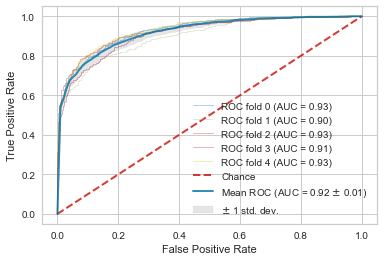

In [142]:
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

fig,ax = plt.subplots()
pipe = Pipeline([('scaler',StandardScaler()), ('classifiers',XGBClassifier())])

### FOLD 0 - TEST / TRAIN SET ###################################
print("\n 0 - FOLD START")
train_df = pd.concat([df_1, df_2, df_3,df_4])
test_df = df_0
X_train = train_df.drop(columns=["HE_DM"])
Y_train = train_df.HE_DM
X_test = test_df.drop(columns=["HE_DM"])
Y_test = test_df.HE_DM

# DO SMOTE ALG
smote = SMOTE(random_state=0)
X_train_over,Y_train_over = smote.fit_sample(X_train,Y_train)
#PIPELINE RESAMPLED WORKFLOW
pipe.fit(X_train_over,Y_train_over)
y_preds=pipe.predict(X_test)
metrics(Y_test,y_preds)
#plot_confusion_matrix(pipe,X_test,Y_test)

#plot set
viz = plot_roc_curve(pipe, X_test, Y_test,
                         name='ROC fold {}'.format(0),
                         alpha=0.3, lw=1, ax=ax)
interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
interp_tpr[0] = 0.0
tprs.append(interp_tpr)
aucs.append(viz.roc_auc)


### FOLD 1 - TEST / TRAIN SET ###################################
print("\n 1 - FOLD START")
train_df = pd.concat([df_0, df_2, df_3,df_4])
test_df = df_1
X_train = train_df.drop(columns=["HE_DM"])
Y_train = train_df.HE_DM
X_test = test_df.drop(columns=["HE_DM"])
Y_test = test_df.HE_DM

# DO SMOTE ALG
smote = SMOTE(random_state=0)
X_train_over,Y_train_over = smote.fit_sample(X_train,Y_train)

#PIPELINE RESAMPLED WORKFLOW
pipe.fit(X_train_over,Y_train_over)
y_preds=pipe.predict(X_test)
metrics(Y_test,y_preds)
#plot_confusion_matrix(pipe,X_test,Y_test)

#plot set
viz = plot_roc_curve(pipe, X_test, Y_test,
                         name='ROC fold {}'.format(1),
                         alpha=0.3, lw=1, ax=ax)
interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
interp_tpr[0] = 0.0
tprs.append(interp_tpr)
aucs.append(viz.roc_auc)


### FOLD 2 - TEST / TRAIN SET ###################################
print("\n 2 - FOLD START")
train_df = pd.concat([df_0, df_1, df_3,df_4])
test_df = df_2
X_train = train_df.drop(columns=["HE_DM"])
Y_train = train_df.HE_DM
X_test = test_df.drop(columns=["HE_DM"])
Y_test = test_df.HE_DM

# DO SMOTE ALG
smote = SMOTE(random_state=0)
X_train_over,Y_train_over = smote.fit_sample(X_train,Y_train)
#PIPELINE RESAMPLED WORKFLOW
pipe.fit(X_train_over,Y_train_over)
y_preds=pipe.predict(X_test)#2
metrics(Y_test,y_preds)
#plot_confusion_matrix(pipe,X_test,Y_test)

#plot set
viz = plot_roc_curve(pipe, X_test, Y_test,
                         name='ROC fold {}'.format(2),
                         alpha=0.3, lw=1, ax=ax)
interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
interp_tpr[0] = 0.0
tprs.append(interp_tpr)
aucs.append(viz.roc_auc)


### FOLD 3 - TEST / TRAIN SET ###################################
print("\n 3 - FOLD START")
train_df = pd.concat([df_0, df_1, df_2,df_4])
test_df = df_3
X_train = train_df.drop(columns=["HE_DM"])
Y_train = train_df.HE_DM
X_test = test_df.drop(columns=["HE_DM"])
Y_test = test_df.HE_DM

# DO SMOTE ALG
smote = SMOTE(random_state=0)
X_train_over,Y_train_over = smote.fit_sample(X_train,Y_train)
#PIPELINE RESAMPLED WORKFLOW
pipe.fit(X_train_over,Y_train_over)
y_preds=pipe.predict(X_test)
metrics(Y_test,y_preds)
print("#3" ,len(y_preds))
#plot_confusion_matrix(pipe,X_test,Y_test)

#plot set
viz = plot_roc_curve(pipe, X_test, Y_test,
                         name='ROC fold {}'.format(3),
                         alpha=0.3, lw=1, ax=ax)
interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
interp_tpr[0] = 0.0
tprs.append(interp_tpr)
aucs.append(viz.roc_auc)


### FOLD 4 - TEST / TRAIN SET ###################################
print("\n 4 - FOLD START")
train_df = pd.concat([df_0, df_1, df_2, df_3])
test_df = df_4
X_train = train_df.drop(columns=["HE_DM"])
Y_train = train_df.HE_DM
X_test = test_df.drop(columns=["HE_DM"])
Y_test = test_df.HE_DM
pipe = Pipeline([('scaler',StandardScaler()), ('classifiers',XGBClassifier())])
# DO SMOTE ALG
#smote = SMOTE(random_state=0)
#X_train_over,Y_train_over = smote.fit_sample(X_train,Y_train)
#PIPELINE RESAMPLED WORKFLOW
pipe.fit(X_train,Y_train)
y_preds=pipe.predict(X_test)
metrics(Y_test,y_preds)
#plot_confusion_matrix(pipe,X_test,Y_test)

#plot set
viz = plot_roc_curve(pipe, X_test, Y_test,
                         name='ROC fold {}'.format(4),
                         alpha=0.3, lw=1, ax=ax)
interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
interp_tpr[0] = 0.0
tprs.append(interp_tpr)
aucs.append(viz.roc_auc)


#############################
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
#       title="XGBOOST ROC CURVE 5-fold")
ax.legend(loc="lower right")
#plt.figure(figsize=(5,5))
#plt.show()
plt.savefig('./ROC-2.jpg',dpi=300)